In [ ]:
# mglearn은 머신러닝 공부용 package이다. 
# 'python 라이브러리를 활용한 머신러닝'의 저자가 만들어서 제공함.
# !pip install mglearn

In [1]:
import mglearn

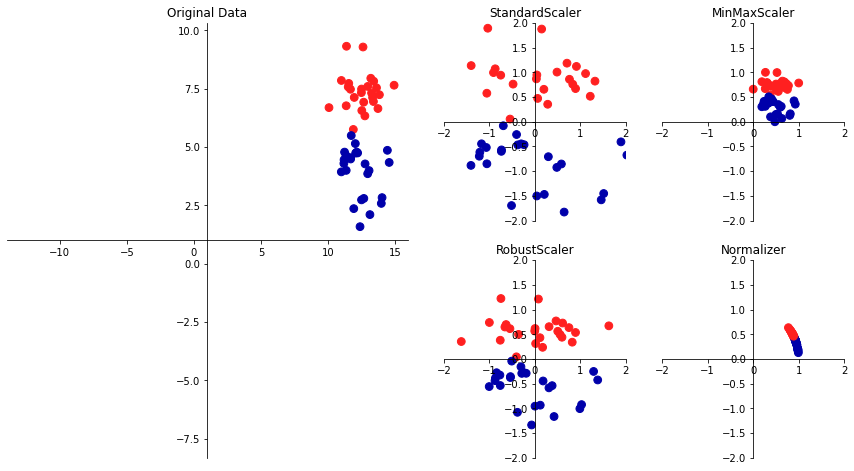

In [2]:
mglearn.plot_scaling.plot_scaling()

- StandardScaler 
    - 평균 0, 표준편차 1
    - $z = \frac{x-\mu}{\sigma}$, $\mu$는 평균 $\sigma$는 표준편차
- MinMaxScaler
    - 최솟값 0, 최댓값 1
    - $z = \frac{x-x_{min}}{x_{max}- x_{min}}$
    
    
    
MinMaxSclaer: 매우 다른 스케일의 범위를 0 ~ 1사이로 변환하고 만약에 데이터 음수값이 있으면 -1 ~ 1사이로 변환한다.

StandardScalar : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지며, 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지 않는다.

RobustScaler:  특성들이 같은 스케일을 갖게 되지만 평균과 분산 대신 중앙값과 사분위값을 사용하므로 이상치값에 영향을 받지 않는다.

Nomalizer:  uclidian의 길이가 1이 되도록 데이터 포인트를 조정하며 각도가 많이 중요할 때 사용한다.    

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
import pandas as pd

In [174]:
import numpy as np

In [75]:
from sklearn.linear_model import LogisticRegression

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

In [176]:
# train 데이터 생성
train_array = np.arange(0, 11).reshape(-1,1)
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [178]:
# test 데이터 생성
test_array = np.arange(0, 6).reshape(-1,1)
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [179]:
ms = MinMaxScaler()

In [180]:
ms.fit(train_array)

MinMaxScaler()

In [182]:
train_scaled = ms.transform(train_array)

In [186]:
print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [194]:
ms.fit(test_array)

MinMaxScaler()

In [195]:
test_scaled = ms.transform(test_array)

In [196]:
print('원본 test_array 데이터 :', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


train 데이터의 2는 0.2이고 test데이터의 2는 0.4로 서로 다르다.   
그러므로, train 데이터를 가지고 scaling한 기준 정보를 그대로 test 데이터에도 적용해줘야 한다.

In [197]:
ms = MinMaxScaler()
ms.fit(train_array)
train_scaled = ms.transform(train_array)
print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

test_scaled = ms.transform(test_array)
print('원본 test_array 데이터 :', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


##  StandardScaler, MinMaxScaler, RobustScaler, Normalizer 

In [88]:
data_cancer= load_breast_cancer()

In [89]:
dir(data_cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [90]:
data_pd = pd.DataFrame(data_cancer.data, columns = data_cancer.feature_names)
data_pd['target'] = pd.DataFrame(data_cancer.target, columns=['target'])

In [91]:
breast_cancer = data_pd.copy()
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [92]:
# scikit-learn은 기본적으로 인스턴스화 -> fit 하는  구조이다.
ss = StandardScaler()

In [93]:
# worst area는 breast_cancer 데이터 중에서 편차가 가장 큰 feature이다.
breast_cancer.describe().T['std'].nlargest()

worst area         569.356993
mean area          351.914129
area error          45.491006
worst perimeter     33.602542
mean perimeter      24.298981
Name: std, dtype: float64

In [145]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], 
                                                    breast_cancer.target, 
                                                    stratify=breast_cancer.target)

In [147]:
lrl = LogisticRegression(max_iter=4000)
lrl.fit(X_train, y_train)
lrl.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [148]:
lrl.score(X_test, y_test)

0.965034965034965

In [1]:
# # ValueError: Expected 2D array, got 1D array instead
# ss.fit(X_train['worst area'])

In [96]:
# fancy indexing -> 2차원
ss.fit(X_train[['worst area']])

StandardScaler()

In [97]:
vars(ss)

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 1,
 'n_samples_seen_': 426,
 'mean_': array([879.22535211]),
 'var_': array([317249.89264366]),
 'scale_': array([563.24940536])}

array([[<AxesSubplot:title={'center':'worst area'}>]], dtype=object)

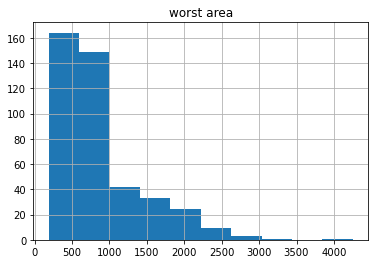

In [98]:
X_train[['worst area']].hist()

In [99]:
# transform은 데이터를 바꾼다.  
X_train['worst area'] = ss.transform(X_train[['worst area']])

In [100]:
 X_train['worst area']

17     0.773680
514    0.155836
249   -0.687840
201    0.638748
199    0.292543
         ...   
187   -0.635110
78     1.320507
491    0.587261
545   -0.265292
437   -0.229428
Name: worst area, Length: 426, dtype: float64

array([[<AxesSubplot:title={'center':'worst area'}>]], dtype=object)

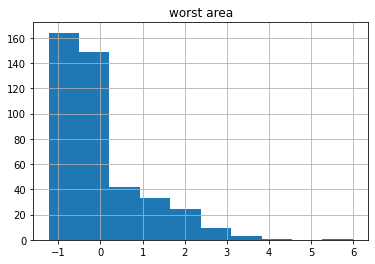

In [101]:
X_train[['worst area']].hist()

In [102]:
# fit과 transform 을 한번에 처리하는 fit_transform을 지원한다.
#X_train['wrost area'] = ss.fit_transform(X_train[['worst area']])

In [103]:
lrl = LogisticRegression(max_iter=4000)

In [104]:
lrl.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [105]:
print(y_test)

95     0
517    0
553    1
183    1
431    1
      ..
439    1
243    1
417    0
308    1
60     1
Name: target, Length: 143, dtype: int32


In [106]:
# X_test에는 StandardScaler을 적용을 안했기 때문에 성능이 많이 떨어진다.
lrl.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
lrl.score(X_test, y_test)

0.3706293706293706

In [108]:
# 검증 또는 테스트를 할때는 train에서 생성한 fit을 그대로 사용한다.
# 스케일링을 먼저하고 테스트셋을 나누면 안된다.
#이유 : 테스트 세트의 스케일 정보가 훈련 세트에 반영되면 안된다.
#ss.fit(X_test[['worst area']])
X_test['worst area'] = ss.transform(X_test[['worst area']])
lrl.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [109]:
lrl.score(X_test, y_test)

0.951048951048951

### MinMaxScaler

In [124]:
mm = MinMaxScaler()

In [132]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], 
                                                    breast_cancer.target, 
                                                    stratify=breast_cancer.target)

In [133]:
mm.fit(X_train[['worst area']])

MinMaxScaler()

In [135]:
X_train['worst area'] = mm.transform(X_train[['worst area']])

In [136]:
X_train['worst area']

504    0.028264
399    0.092607
303    0.046746
170    0.089437
43     0.177448
         ...   
15     0.186296
171    0.198683
176    0.050383
211    0.088749
534    0.054635
Name: worst area, Length: 426, dtype: float64

In [137]:
lrl = LogisticRegression(max_iter=4000)

In [138]:
lrl.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [139]:
lrl.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [140]:
lrl.score(X_test, y_test)

0.5314685314685315

In [141]:
X_test['worst area'] = mm.transform(X_test[['worst area']])

In [143]:
lrl.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [144]:
lrl.score(X_test, y_test)

0.965034965034965

### RobustScaler

In [152]:
rs = RobustScaler()

In [153]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], 
                                                    breast_cancer.target, 
                                                    stratify=breast_cancer.target)

In [154]:
rs.fit(X_train[['worst area']])

RobustScaler()

In [155]:
X_train['worst area'] = rs.transform(X_train[['worst area']])

In [156]:
lrl = LogisticRegression(max_iter=4000)

In [157]:
lrl.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [158]:
lrl.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
lrl.score(X_test, y_test)

0.3706293706293706

In [160]:
X_test['worst area'] = rs.transform(X_test[['worst area']])

In [161]:
lrl.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [162]:
lrl.score(X_test, y_test)

0.972027972027972

### Normalizer

In [165]:
nm = Normalizer()

In [166]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], 
                                                    breast_cancer.target, 
                                                    stratify=breast_cancer.target)

In [167]:
nm.fit(X_train[['worst area']])

Normalizer()

In [168]:
X_train['worst area'] = nm.transform(X_train[['worst area']])

In [169]:
lrl = LogisticRegression(max_iter=4000)

In [170]:
lrl.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [171]:
X_test['worst area'] = nm.transform(X_test[['worst area']])

In [172]:
lrl.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [173]:
lrl.score(X_test, y_test)

0.9440559440559441

- original:  0.965034965034965
- StandardScaler : 0.951048951048951
- MinMaxScaler : 0.965034965034965 
- RobustScaler : 0.972027972027972 
- Normalizer : 0.9440559440559441


scaling 이후에 성능이 오르지 않았다는 것은, worst area라는 feature의 scale이 학습에 큰 영향을 미치지 않았다는 것이다.